## Hyphothesis 4/5: 
### The alternaive portfolio will have a return >0.0 and will outperform the Control Portfolios (30 random stocks sected from 2 pools) in 2019 and 2020

## Criteria for Alternative Portfolio:
### Return during 9/2008-12/2008 > MKT return during the same time

In [107]:
from IPython.core.display import display, HTML
display(HTML("<style>.container { width:90% !important; }</style>"))

### import prices and return data

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import os

In [141]:
from random import shuffle
import random
import seaborn as sns

In [3]:
os.chdir('C:\\Users\\A Sua\\Documents\\FIU\\CAP2020')

In [23]:
df_price = pd.read_csv('data\\processed\\df_price07_20.csv')
df_return = pd.read_csv('data\\processed\\df_return7_20.csv')

df_price.rename(columns={'Unnamed: 0': 'date'}, inplace=True)
df_return.rename(columns={'Unnamed: 0': 'date'}, inplace=True)

df_price.index = pd.to_datetime(df_price['date'])
df_return.index = pd.to_datetime(df_return['date'])

df_price = df_price.drop('date', axis=1)
df_return = df_return.drop('date', axis=1)

In [33]:
dfsp = pd.read_csv('data\\external\\SP500_07_20.csv')
dfsp.index = pd.to_datetime(dfsp['date'])
dfsp = dfsp.drop('date', axis=1)
dfsp.head(1)

,Open,High,Low,Close,Volume,Return
date,,,,,,
2020-03-24,2344.4399,2400.6001,2344.4399,2398.0901,1.597733e+09,0.022884


In [28]:
df_price.head(1)

,A,AAL,AAP,AAPL,ABC,ABMD,ABT,ACN,ADBE,ADI,...,WYNN,XEC,XEL,XLNX,XOM,XRAY,XRX,YUM,ZBH,ZION
date,,,,,,,,,,,,,,,,,,,,,
2020-03-20,66.46,10.38,75.03,229.24,80.61,130.51,68.0,149.94,295.34,85.08,...,51.97,14.8,50.63,71.86,32.74,32.82,16.45,58.08,85.98,25.58


In [29]:
df_return.head(1)

,A,AAL,AAP,AAPL,ABC,ABMD,ABT,ACN,ADBE,ADI,...,WYNN,XEC,XEL,XLNX,XOM,XRAY,XRX,YUM,ZBH,ZION
date,,,,,,,,,,,,,,,,,,,,,
2020-03-20,0.007122,-0.02559,-0.132501,-0.072579,-0.071741,-0.081756,-0.081702,-0.048181,-0.05618,-0.072015,...,0.053346,-0.122703,-0.141864,-0.070375,-0.060276,-0.073405,-0.079978,-0.093067,-0.050679,-0.0654


### Generate Dates for Monthly Returns

In [ ]:
start_dates = pd.to_datetime(['2010-01-04', '2010-02-01', '2010-03-01', '2010-04-01', '2010-05-03', '2010-06-01', 
              '2010-07-01', '2010-08-02', '2010-09-01', '2010-10-01', '2010-11-01', '2010-12-01', 
              '2011-01-03', '2011-02-01', '2011-03-01', '2011-04-01', '2011-05-02', '2011-06-01', 
              '2011-07-01', '2011-08-01', '2011-09-01', '2011-10-03', '2011-11-01', '2011-12-01', 
              '2012-01-03', '2012-02-01', '2012-03-01', '2012-04-02', '2012-05-01', '2012-06-01', 
              '2012-07-02', '2012-08-01', '2012-09-04', '2012-10-01', '2012-11-01', '2012-12-03',
              '2013-01-02', '2013-02-01', '2013-03-01', '2013-04-01', '2013-05-01', '2013-06-03', 
              '2013-07-01', '2013-08-01', '2013-09-03', '2013-10-01', '2013-11-01', '2013-12-02', 
              '2014-01-02', '2014-02-03', '2014-03-03', '2014-04-01', '2014-05-01', '2014-06-02', 
              '2014-07-01', '2014-08-01', '2014-09-02', '2013-10-01', '2014-11-03', '2014-12-01', 
              '2015-01-02', '2015-02-02', '2015-03-02', '2015-04-01', '2015-05-01', '2015-06-01',
              '2015-07-01', '2015-08-03', '2015-09-01', '2015-10-01', '2015-11-02', '2015-12-01', 
              '2016-01-04', '2016-02-01', '2016-03-01', '2016-04-01', '2016-05-02', '2016-06-01', 
              '2016-07-01', '2016-08-01', '2016-09-01', '2016-10-03', '2016-11-01', '2016-12-01', 
              '2017-01-03', '2017-02-01', '2017-03-01', '2017-04-03', '2017-05-01', '2017-06-01', 
              '2017-07-03', '2017-08-01', '2017-09-01', '2017-10-02', '2017-11-01', '2017-12-01', 
              '2018-01-02', '2018-02-01', '2018-03-01', '2018-04-02', '2018-05-01', '2018-06-01', 
              '2018-07-02', '2018-08-01', '2018-09-04', '2018-10-01', '2018-11-01', '2018-12-03'])

end_dates = pd.to_datetime(['2010-01-29', '2010-02-26', '2010-03-31', '2010-04-30', '2010-05-28', '2010-06-30', 
            '2010-07-30', '2010-08-31', '2010-09-30', '2010-10-29', '2010-11-30', '2010-12-31', 
            '2011-01-31', '2011-02-28', '2011-03-31', '2011-04-29', '2011-05-31', '2011-06-30', 
            '2011-07-29', '2011-08-31', '2011-09-30', '2011-10-31', '2011-11-30', '2011-12-30', 
            '2012-01-31', '2012-02-29', '2012-03-30', '2012-04-30', '2012-05-31', '2012-06-29', 
            '2012-07-31', '2012-08-31', '2012-09-28', '2012-10-31', '2012-11-30', '2012-12-31', 
            '2013-01-31', '2013-02-28', '2013-03-28', '2013-04-30', '2013-05-31', '2013-06-28', 
            '2013-07-31', '2013-08-30', '2013-09-30', '2013-10-31', '2013-11-29', '2013-12-31', 
            '2014-01-31', '2014-02-28', '2014-03-31', '2014-04-30', '2014-05-30', '2014-06-30', 
            '2014-07-31', '2014-08-29', '2014-09-30', '2014-10-31', '2014-11-28', '2014-12-31', 
            '2015-01-30', '2015-02-27', '2015-03-31', '2015-04-30', '2015-05-29', '2015-06-30', 
            '2015-07-31', '2015-08-31', '2015-09-30', '2015-10-30', '2015-11-30', '2015-12-31', 
            '2016-01-29', '2016-02-29', '2016-03-31', '2016-04-29', '2016-05-31', '2016-06-30', 
            '2016-07-29', '2016-08-31', '2016-09-30', '2016-10-31', '2016-11-30', '2016-12-30', 
            '2017-01-31', '2017-02-28', '2017-03-31', '2017-04-28', '2017-05-31', '2017-06-30', 
            '2017-07-31', '2017-08-31', '2017-09-29', '2017-10-31', '2017-11-30', '2017-12-29', 
            '2018-01-31', '2018-02-28', '2018-03-29', '2018-04-30', '2018-05-31', '2018-06-29', 
            '2018-07-31', '2018-08-31', '2018-09-28', '2018-10-31', '2018-11-30', '2018-12-31'])

# function to validate lists above

def list_diff(list1, list2):
    out = [item for item in list1 if not item in list2]
    return out

# validate start dates list

print('Missing Start Dates: {}'.format(list_diff(start_dates, list(df_price.index))))

# validate end dates list

print('Missing End Dates: {}'.format(list_diff(end_dates, list(df_price.index))))

#### RETURNS: 8/2008-12/2008: S&P

In [47]:
return_sp08 = ((dfsp.loc['2008-12-31', 'Close'].values-dfsp.loc['2008-09-02', 'Open'].values)/dfsp.loc['2008-09-02', 'Open'].values)[0]
return_sp08

-0.2986263714931318

#### RETURNS: 2019: S&P

In [48]:
return_sp19 = ((dfsp.loc['2019-12-31', 'Close'].values-dfsp.loc['2019-01-02', 'Open'].values)/dfsp.loc['2019-01-02', 'Open'].values)[0]
return_sp19

0.30433273044376985

#### RETURNS: 2020: S&P

In [52]:
return_sp20 = ((dfsp.loc['2020-03-20', 'Close'].values-dfsp.loc['2020-01-02', 'Open'].values)/dfsp.loc['2020-01-02', 'Open'].values)[0]
return_sp20

-0.2896288463735556

### Company Symbols

In [55]:
companies = df_price.columns

### RETURNS: 8/2008-12/2008: PER COMPANY

In [59]:
worst_days_returns08 = {}
for symbol in companies:
    temp_end = df_price.loc['2008-12-31', symbol].values
    temp_start = df_price.loc['2008-08-29', symbol].values
    temp_ret = ((temp_end-temp_start)/temp_start)[0]
    worst_days_returns08[symbol] = temp_ret
worst_days_returns08['ORCL']

-0.19151846785225715

### Risk Free Rates

## Alt Portfolio Construction

### Set Decision Boundary based off of returns beating the S&P 0.01, 0.02, 0.03, ....

In [173]:
t_values = np.arange(0, 0.25, 0.01) 
t_values

array([0.  , 0.01, 0.02, 0.03, 0.04, 0.05, 0.06, 0.07, 0.08, 0.09, 0.1 ,
       0.11, 0.12, 0.13, 0.14, 0.15, 0.16, 0.17, 0.18, 0.19, 0.2 , 0.21,
       0.22, 0.23, 0.24])

In [66]:
t_values = np.arange(0, 0.25, 0.01) 
for value in t_values:
    alt_list = []
    control_list1 = []
    for symbol in companies:
        temp_series = worst_days_returns08[symbol]
        if temp_series-return_sp08>value:
            alt_list.append(symbol)
        else:
            control_list1.append(symbol)
    print('Alt pool size: {}, Ctl1 pool size {}'.format(len(alt_list), len(control_list1)))

Alt pool size: 191, Ctl1 pool size 224
Alt pool size: 182, Ctl1 pool size 233
Alt pool size: 173, Ctl1 pool size 242
Alt pool size: 168, Ctl1 pool size 247
Alt pool size: 159, Ctl1 pool size 256
Alt pool size: 155, Ctl1 pool size 260
Alt pool size: 148, Ctl1 pool size 267
Alt pool size: 144, Ctl1 pool size 271
Alt pool size: 138, Ctl1 pool size 277
Alt pool size: 129, Ctl1 pool size 286
Alt pool size: 120, Ctl1 pool size 295
Alt pool size: 111, Ctl1 pool size 304
Alt pool size: 105, Ctl1 pool size 310
Alt pool size: 104, Ctl1 pool size 311
Alt pool size: 101, Ctl1 pool size 314
Alt pool size: 94, Ctl1 pool size 321
Alt pool size: 81, Ctl1 pool size 334
Alt pool size: 77, Ctl1 pool size 338
Alt pool size: 69, Ctl1 pool size 346
Alt pool size: 64, Ctl1 pool size 351
Alt pool size: 57, Ctl1 pool size 358
Alt pool size: 50, Ctl1 pool size 365
Alt pool size: 46, Ctl1 pool size 369
Alt pool size: 39, Ctl1 pool size 376
Alt pool size: 36, Ctl1 pool size 379


### Alternative Portfolio, weigthted by optimal sharpe ratio

### Lets pick the Threshold = 0, 

### Pick Alt, Control 1, Control 2

In [131]:
value=0.10
alt_list = []
control_list1 = []
for symbol in companies:
    temp_series = worst_days_returns08[symbol]
    if temp_series-return_sp08>value:
        alt_list.append(symbol)
    else:
        control_list1.append(symbol)
print('Alt pool size: {}, Ctl1 pool size {}'.format(len(alt_list), len(control_list1)))

Alt pool size: 120, Ctl1 pool size 295


In [132]:
alt_symbols = random.sample(alt_list, 30)
control_symbols1 = random.sample(control_list1, 30)
control_symbols2 = random.sample(list(companies), 30)

## NAIVE METHOD

### Generate Returns for Alt, Ctl1, Ctl2

In [133]:
alt_close18 = df_price.loc[:, alt_symbols].loc['2018-12-31', :]
alt_close19 = df_price.loc[:, alt_symbols].loc['2019-12-31', :]
alt_close20 = df_price.loc[:, alt_symbols].loc['2020-03-20', :]

alt_return19 = (alt_close19.sum().sum()-alt_close18.sum().sum())/alt_close18.sum().sum()
alt_return20 = (alt_close20.sum().sum()-alt_close19.sum().sum())/alt_close19.sum().sum()
alt_return19, alt_return20

(0.26440592815875374, -0.3069960342687613)

In [134]:
ctl1_close18 = df_price.loc[:, control_symbols1].loc['2018-12-31', :]
ctl1_close19 = df_price.loc[:, control_symbols1].loc['2019-12-31', :]
ctl1_close20 = df_price.loc[:, control_symbols1].loc['2020-03-20', :]

ctl1_return19 = (ctl1_close19.sum().sum()-ctl1_close18.sum().sum())/ctl1_close18.sum().sum()
ctl1_return20 = (ctl1_close20.sum().sum()-ctl1_close19.sum().sum())/ctl1_close19.sum().sum()

ctl1_return19, ctl1_return20

(0.32111082043558914, -0.24457404031069704)

In [135]:
ctl2_close18 = df_price.loc[:, control_symbols2].loc['2018-12-31', :]
ctl2_close19 = df_price.loc[:, control_symbols2].loc['2019-12-31', :]
ctl2_close20 = df_price.loc[:, control_symbols2].loc['2020-03-20', :]

ctl2_return19 = (ctl2_close19.sum().sum()-ctl2_close18.sum().sum())/ctl2_close18.sum().sum()
ctl2_return20 = (ctl2_close20.sum().sum()-ctl2_close19.sum().sum())/ctl2_close19.sum().sum()

ctl2_return19, ctl2_return20

(0.15705418336997276, -0.2621881610984712)

In [167]:
sp_scatter_data19 = zip(r_thresholds, [return_sp19 for i in range(len(r_thresholds))])#, [return_sp20 for i in range(len(r_thresholds))])
sp_scatter_data20 = zip(r_thresholds, [return_sp20 for i in range(len(r_thresholds))])

sp_df19 = pd.DataFrame(sp_scatter_data19, columns=['r_value', 'returns19'])
sp_df20 = pd.DataFrame(sp_scatter_data20, columns=['r_value', 'returns20'])

In [174]:
#r_thresholds = [0, 0.02, 0.04, 0.06, 0.08, 0.1, 0.12, 0.14, 0.16, 0.18, 0.2, 0.22] ## threshold value compared to market
r_thresholds = [0, 0.02, 0.04, 0.06, 0.08, 0.1, 0.12, 0.14, 0.16, 0.18] ## threshold value compared to market
portfolio_size = [10, 20, 30, 40] ## number of stocks in each portfolio
n_samples = [20, 30, 40, 50, 60]#, 100, 200] ### number of bootstraps of sample_size=portfolio size 

comparison_df = pd.DataFrame([])

#pd.DataFrame(comparison_dic, index=['sample1'])

for value in r_thresholds:
    """generate/sample symbols"""
    for size in portfolio_size:
        for sample_size in n_samples:
            n_bootstraps = sample_size
            for i in range(n_bootstraps):
                comparison_dic = {}
                alt_list = []
                control_list1 = []
                        
                for symbol in companies:
                    temp_series = worst_days_returns08[symbol]
                    if temp_series-return_sp08>value:
                        alt_list.append(symbol)
                    else:
                        control_list1.append(symbol)
                #print('Alt pool size: {}, Ctl1 pool size {}'.format(len(alt_list), len(control_list1)))

                #print(len(alt_list),len(control_list))

#                 alt_symbols = random.sample(alt_list, size)
#                 control_symbols = random.sample(control_list, size)                
                alt_symbols = random.sample(alt_list, size)
                control_symbols1 = random.sample(control_list1, size)
                control_symbols2 = random.sample(list(companies), size)
                

                ### Generage Beginning/End Prices of the portfolios
                alt_close18 = df_price.loc[:, alt_symbols].loc['2018-12-31', :]
                alt_close19 = df_price.loc[:, alt_symbols].loc['2019-12-31', :]
                alt_close20 = df_price.loc[:, alt_symbols].loc['2020-03-20', :]
                                
                ctl1_close18 = df_price.loc[:, control_symbols1].loc['2018-12-31', :]
                ctl1_close19 = df_price.loc[:, control_symbols1].loc['2019-12-31', :]
                ctl1_close20 = df_price.loc[:, control_symbols1].loc['2020-03-20', :]
                               
                ctl2_close18 = df_price.loc[:, control_symbols2].loc['2018-12-31', :]
                ctl2_close19 = df_price.loc[:, control_symbols2].loc['2019-12-31', :]
                ctl2_close20 = df_price.loc[:, control_symbols2].loc['2020-03-20', :]
                
                ### generate returns
                alt_return19 = (alt_close19.sum().sum()-alt_close18.sum().sum())/alt_close18.sum().sum()
                alt_return20 = (alt_close20.sum().sum()-alt_close19.sum().sum())/alt_close19.sum().sum()
                ctl1_return19 = (ctl1_close19.sum().sum()-ctl1_close18.sum().sum())/ctl1_close18.sum().sum()
                ctl1_return20 = (ctl1_close20.sum().sum()-ctl1_close19.sum().sum())/ctl1_close19.sum().sum()
                ctl2_return19 = (ctl2_close19.sum().sum()-ctl2_close18.sum().sum())/ctl2_close18.sum().sum()
                ctl2_return20 = (ctl2_close20.sum().sum()-ctl2_close19.sum().sum())/ctl2_close19.sum().sum()                

                
                comparison_dic['control1_19'] = ctl1_return19,
                comparison_dic['control1_20'] = ctl1_return20,                

                comparison_dic['alternate19'] = alt_return19
                comparison_dic['alternate20'] = alt_return20                
                
                comparison_dic['r_value'] = value
                comparison_dic['sample_size'] = n_bootstraps
                comparison_dic['portfolio_size'] = size
                temp_df = pd.DataFrame(comparison_dic)

                comparison_df = pd.concat([comparison_df, temp_df])
                
comparison_df

,control1_19,control1_20,alternate19,alternate20,r_value,sample_size,portfolio_size
0,0.324993,-0.224163,0.201499,-0.360074,0.00,20,10
0,0.131435,-0.399877,0.204180,-0.284268,0.00,20,10
0,0.299638,-0.337549,0.181296,-0.231838,0.00,20,10
0,0.332247,-0.401405,0.299355,-0.165275,0.00,20,10
0,0.343204,-0.330027,0.367711,-0.401609,0.00,20,10
...,...,...,...,...,...,...,...
0,0.412531,-0.277212,0.160330,-0.248084,0.18,60,40
0,0.340205,-0.302790,0.181091,-0.273257,0.18,60,40
0,0.244922,-0.186453,0.314934,-0.284331,0.18,60,40
0,0.206383,-0.224448,0.314359,-0.282684,0.18,60,40


In [175]:
# sns.catplot(data=melted_df, kind='box', x='r_value', y='returns', hue='portfolio') 

C:\PROGRA1\Anaconda3\lib\site-packages\seaborn\axisgrid.py:311: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  fig, axes = plt.subplots(nrow, ncol, **kwargs)


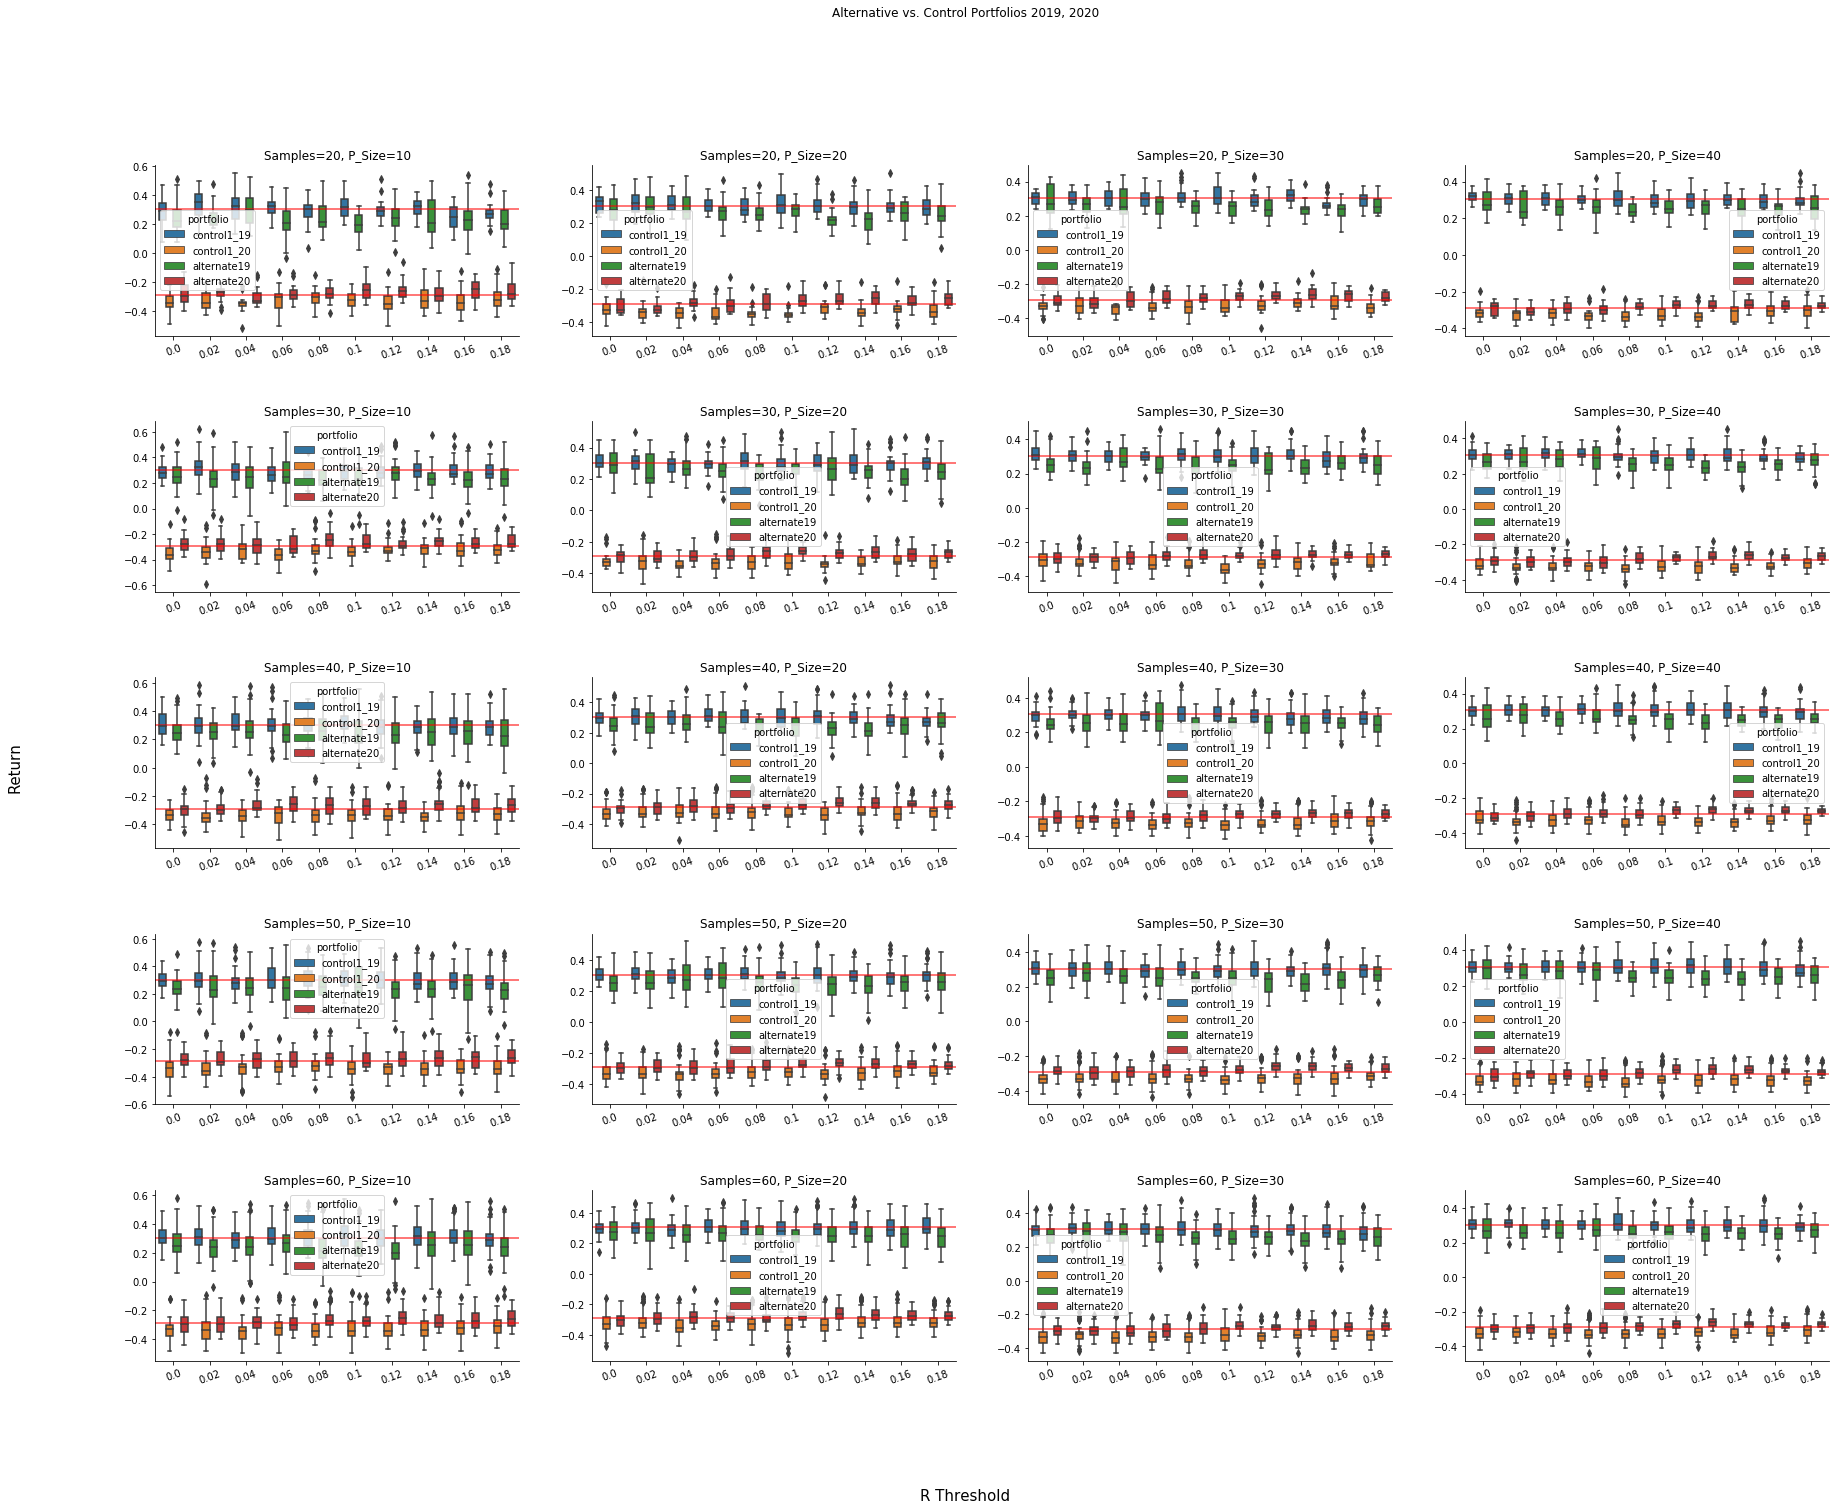

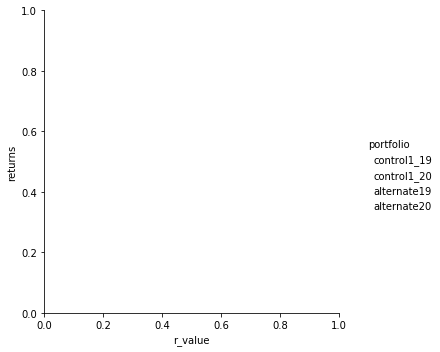

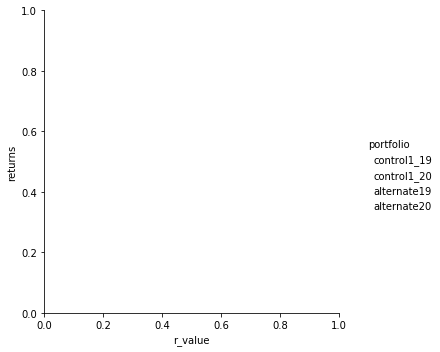

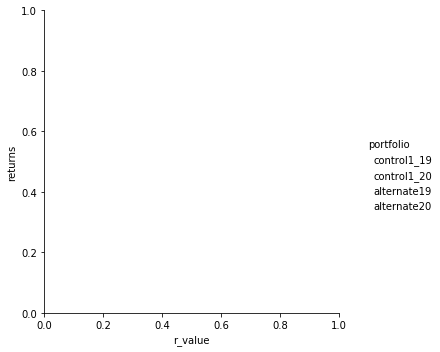

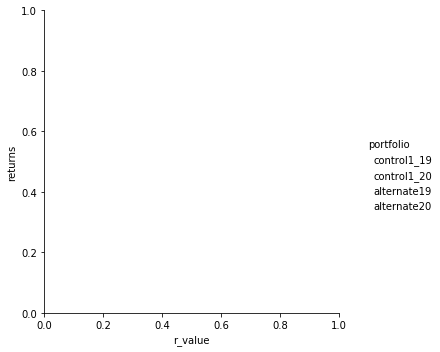

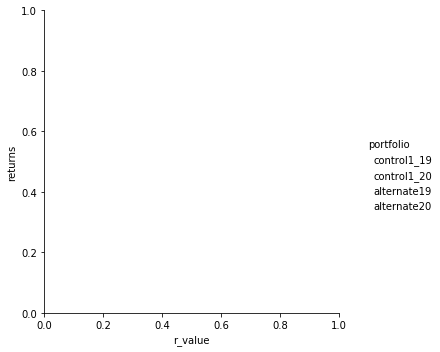

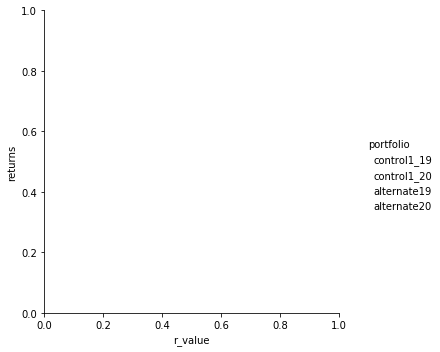

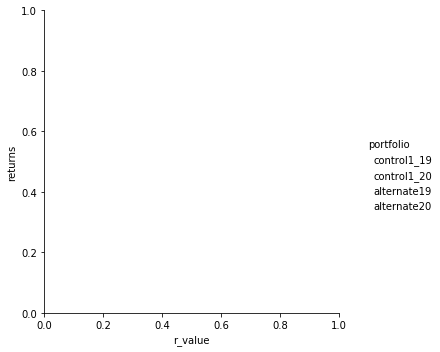

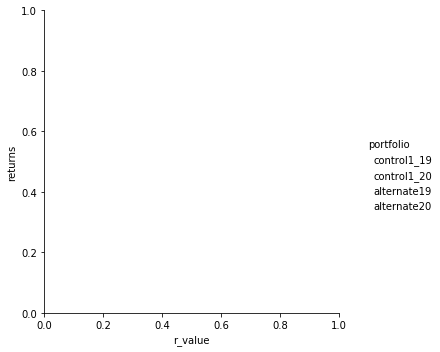

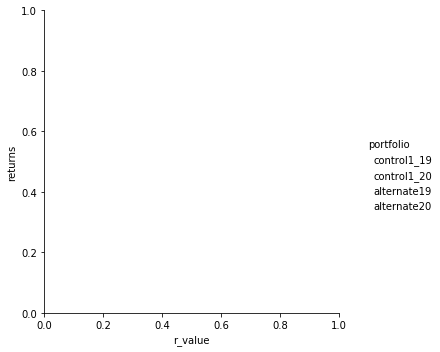

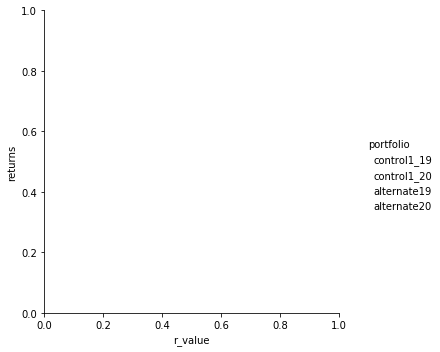

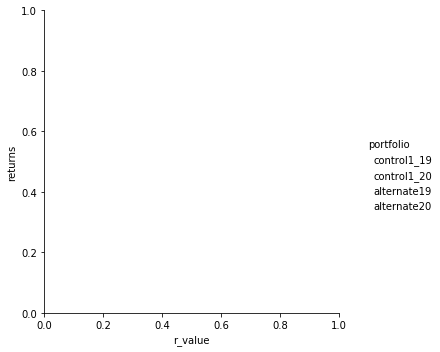

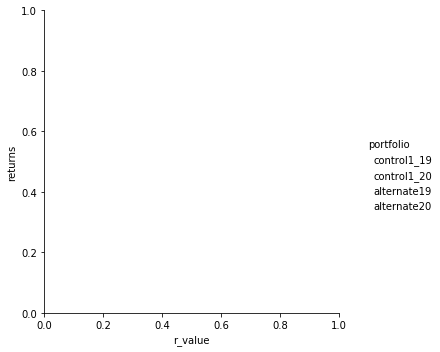

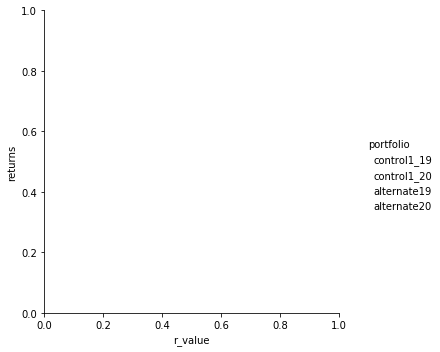

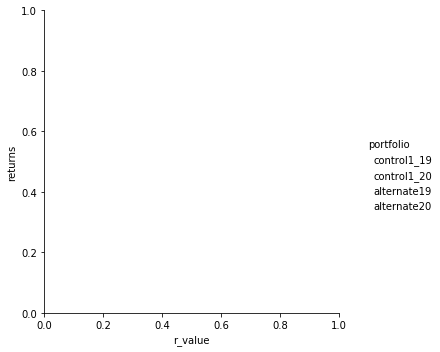

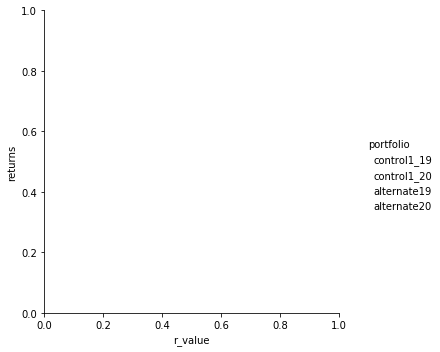

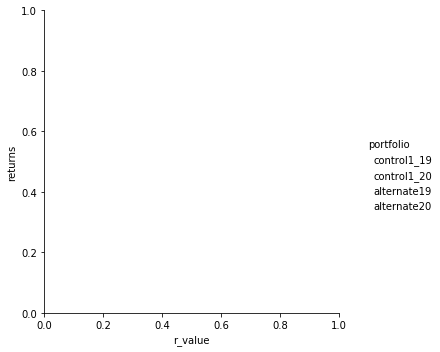

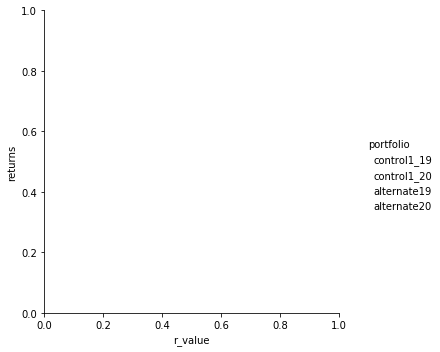

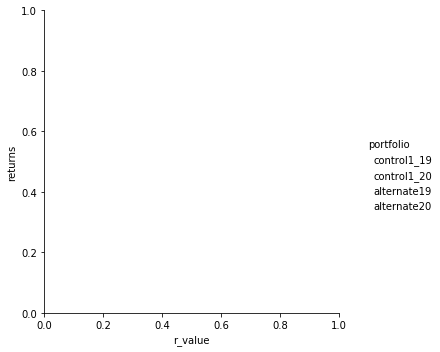

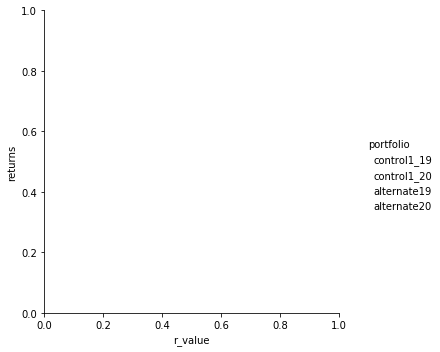

In [176]:
subplot_size = len(portfolio_size)*len(n_samples)
fig, ax = plt.subplots(len(n_samples), len(portfolio_size), figsize=(30,22))
idx_matrix = np.array(range(subplot_size)).reshape(len(n_samples),len(portfolio_size))

for i in range(len(n_samples)):
    for j in range(len(portfolio_size)):
        
        sample_size = n_samples[i]
        p_size = portfolio_size[j]
        temp_axis = ax[i,j]
        
        temp_df = comparison_df[(comparison_df['sample_size']==sample_size) & (comparison_df['portfolio_size']==p_size)]
        melted_df = pd.melt(temp_df,id_vars=['r_value', 'sample_size', 'portfolio_size'], value_vars=['control1_19', 'control1_20', 'alternate19', 'alternate20'],
                    var_name = 'portfolio', value_name='returns')

        sns.catplot(ax=temp_axis, data=melted_df, kind='box', x='r_value', y='returns', hue='portfolio') 
                   #inner='quartile', #inner='stick', 
                    #split=False, 
                    #alpha=0.5)
                    #cut=0)
#         sns.scatterplot(ax=temp_axis, data = sp_df19, x='r_value', y='returns19')#, hue='portfolio')
#         sns.scatterplot(ax=temp_axis, data = sp_df20, x='r_value', y='returns20')#, hue='portfolio')

        temp_axis.spines['top'].set_visible(False)
        temp_axis.spines['right'].set_visible(False)
        temp_axis.set_xlabel('')
        temp_axis.set_ylabel('')        
        
#         temp_axis.get_xaxis().set_ticks([])
#         temp_axis.get_yaxis().set_ticks([])        
        
        temp_axis.set_title('Samples={}, P_Size={}'.format(sample_size, p_size))
        temp_axis.tick_params(axis="x", rotation=20)
        temp_axis.axhline(return_sp19, color='red', alpha=0.7)
        temp_axis.axhline(return_sp20, color='red', alpha=0.7)
        #temp_axis.set_ylim(0, 0.65)


fig.suptitle('Alternative vs. Control Portfolios 2019, 2020')
fig.text(0.5, 0.04, 'R Threshold', ha='center', va='center', fontsize=15)
fig.text(0.06, 0.5, 'Return', ha='center', va='center', rotation='vertical', fontsize=15)
fig.subplots_adjust(hspace=0.5)        
plt.tight_layout()
plt.close()
plt.show()

## SHARPE RATIO METHOD

### check critetria for stock selection

### generate symbles and sample